<a href="https://colab.research.google.com/github/uditiparmar/CODSOFT/blob/main/MovieRatingPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Important Libraries


In [8]:
# Computing Libraries
import numpy as np
import pandas as pd

# Ploting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


In [9]:
df = pd.read_csv('/content/IMDb Movies India.csv',encoding='latin-1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.shape

(15509, 10)

In [11]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [12]:
missing_values = df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)


Missing values in the dataset:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [14]:
df.dropna(subset=["Rating"], inplace=True)

In [15]:
df.dropna(subset=["Duration"], inplace=True)
df.dropna(subset=["Genre"], inplace=True)
df.dropna(subset=["Actor 1"], inplace=True)
df.dropna(subset=["Actor 2"], inplace=True)
df.dropna(subset=["Actor 3"], inplace=True)

In [16]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [17]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


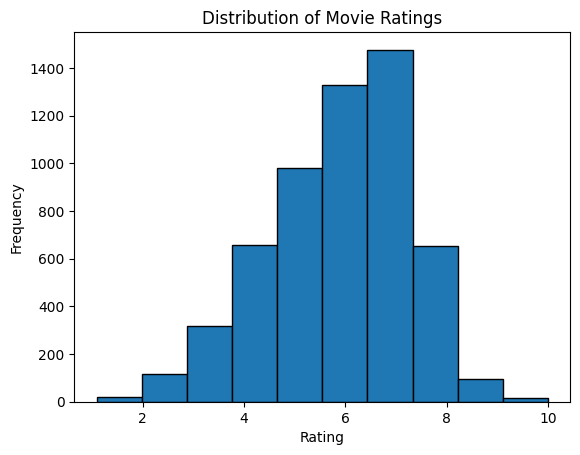

In [18]:
plt.hist(df['Rating'], bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

In [19]:
genre_counts = df['Genre'].value_counts()
print("Most common genres:")
print(genre_counts.head(10))

Most common genres:
Genre
Drama                     844
Drama, Romance            332
Action, Crime, Drama      329
Action, Drama             206
Comedy, Drama             205
Comedy, Drama, Romance    188
Comedy                    187
Action                    170
Drama, Family             160
Romance                   126
Name: count, dtype: int64


In [20]:
avg_Rating_by_genre = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)
print("Average Rating by genre:")
print(avg_Rating_by_genre.head(10))

Average Rating by genre:
Genre
History, Romance                   9.40
Documentary, Family, History       9.30
Documentary, Music                 8.90
Documentary, Thriller              8.70
Documentary, Sport                 8.60
Biography, Family                  8.30
Animation, Comedy, Family          8.30
Music, Romance                     8.25
Documentary, Biography, Musical    8.20
Drama, Musical, Sport              8.10
Name: Rating, dtype: float64


In [21]:
top_rated_movies = df.nlargest(10, 'Rating')
print("Top 10 rated movies:")
print(top_rated_movies[['Name', 'Genre', 'Rating', 'Votes']])

Top 10 rated movies:
                      Name                   Genre  Rating Votes
8339       Love Qubool Hai          Drama, Romance    10.0     5
5410            Half Songs          Music, Romance     9.7     7
5077          Gho Gho Rani        History, Romance     9.4    47
6852                  June                   Drama     9.4    18
14222  The Reluctant Crime                   Drama     9.4    16
1314          Ashok Vatika                   Drama     9.3     7
1729              Baikunth                  Family     9.3    29
5125           God of gods             Documentary     9.3    46
8344          Love Sorries  Comedy, Drama, Romance     9.3    79
11843              Refl3ct                  Sci-Fi     9.3   467


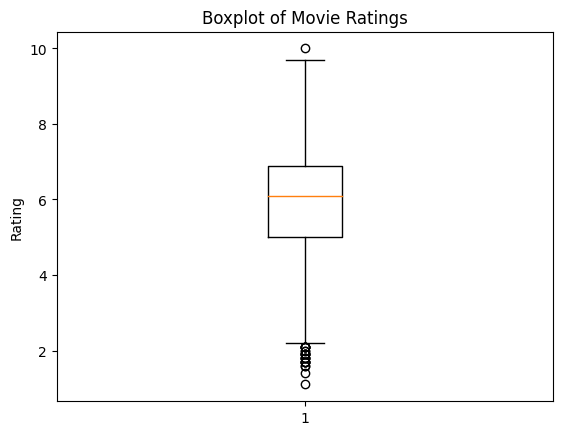

In [22]:
plt.boxplot(df['Rating'])
plt.ylabel('Rating')
plt.title('Boxplot of Movie Ratings')
plt.show()

In [23]:
label_encoder = LabelEncoder()
df["Genre"] = label_encoder.fit_transform(df["Genre"])
df["Director"] = label_encoder.fit_transform(df["Director"])
df["Actor 1"] = label_encoder.fit_transform(df["Actor 1"])
df["Actor 2"] = label_encoder.fit_transform(df["Actor 2"])
df["Actor 3"] = label_encoder.fit_transform(df["Actor 3"])
df["Year"] = label_encoder.fit_transform(df["Year"])
df["Duration"] = label_encoder.fit_transform(df["Duration"])
df["Votes"] = label_encoder.fit_transform(df["Votes"])

In [24]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),88,9,229,7.0,1843,629,1352,2272,319
3,#Yaaram,88,10,184,4.4,1164,1335,1198,719,2148
5,...Aur Pyaar Ho Gaya,66,47,157,4.7,1892,1530,378,75,2045
6,...Yahaan,74,42,289,7.4,34,2044,692,1112,2524
8,?: A Question Mark,81,156,320,5.6,1133,135,1934,1175,1013
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,84,15,229,6.1,1312,1223,1861,1801,1615
15494,Zubeidaa,70,53,133,6.2,178,2059,763,1619,1184
15503,Zulm Ki Zanjeer,58,25,28,5.8,1348,1793,406,754,1685
15505,Zulmi,68,29,38,4.5,1681,1025,112,2164,314


In [25]:
X = df.drop(columns = ['Name', 'Rating'])
Y = df["Rating"]

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

Split Data into Training and Testing Sets

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

Model development and training

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, Y_train)

LinearRegression()

In [29]:
print("Accuracy: ", model.score(X_test, Y_test) * 100)

Accuracy:  6.997632420943479


In [30]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)
# Fit
model.fit(X_train, Y_train)
print("Accuracy --> ", model.score(X_test, Y_test)*100)

Accuracy -->  16.6610803008873


In [31]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.5432231502826852
R-squared: 0.166610803008873
